In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm




df = pd.read_csv("nbaplayersdraft.csv")
df.head(20)


,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
5,6,1989,6,6,CHI,Stacey King,Oklahoma,8.0,438.0,7406.0,...,0.235,0.707,16.9,6.4,3.3,0.9,10.9,0.071,-3.4,-2.7
6,7,1989,7,7,IND,George McCloud,Florida State,12.0,766.0,17429.0,...,0.358,0.810,22.8,9.0,3.1,2.3,24.6,0.068,-0.8,5.3
7,8,1989,8,8,DAL,Randy White,Louisiana Tech,5.0,281.0,5382.0,...,0.193,0.707,19.2,7.4,4.9,0.6,1.9,0.017,-5.0,-4.0
8,9,1989,9,9,WSB,Tom Hammonds,Georgia Tech,12.0,687.0,10419.0,...,0.000,0.691,15.2,5.3,3.3,0.6,14.7,0.068,-3.8,-4.7
9,10,1989,10,10,MIN,Pooh Richardson,UCLA,10.0,639.0,19399.0,...,0.329,0.652,30.4,11.1,2.8,6.5,26.7,0.066,0.2,10.5


### Part 1

A) Which NBA team(s) has drafter the most playes who

    a. went to Duke and were drafter in or before the 2000 draft?
    b. have a first name that begins with D and were drafter in an even year draft (1990, 1992, 1994, ...)?

In [21]:
duke_players = df[(df['college'] == 'Duke') & (df['year'] <= 2000)]
duke_players

team_counts = duke_players['team'].value_counts()
team_counts
max_count = team_counts.max()
teams_with_max_count = team_counts[team_counts == max_count]
print("NBA team(s) that drafted the most players from Duke in or before the 2000 draft:")
for team in teams_with_max_count.index:
    print(team)




NBA team(s) that drafted the most players from Duke in or before the 2000 draft:
DAL
MIN
PHO


In [22]:
filtered_players = df[(df['player'].str.startswith('D')) & (df['year'] %2 == 0)]

team_counts = filtered_players['team'].value_counts()
max_count = team_counts.max()
teams_with_max_count = team_counts[team_counts == max_count]

print("NBA team(s) that drafted the most players with first names starting with 'D' in even years:")
for team in teams_with_max_count.index:
    print(team)





NBA team(s) that drafted the most players with first names starting with 'D' in even years:
BOS
SEA
MIL


 B) Describe the relationship between a team's first round pick slot in one year with their first-round pick slot in the subsequent year.

In [23]:
grouped = df.sort_values('overall_pick').groupby(['team', 'year']).first()


In [24]:
odd_years = grouped.loc[grouped.index.get_level_values('year') % 2 != 0, 'points_per_game']
even_years = grouped.loc[grouped.index.get_level_values('year') % 2 == 0, 'points_per_game']




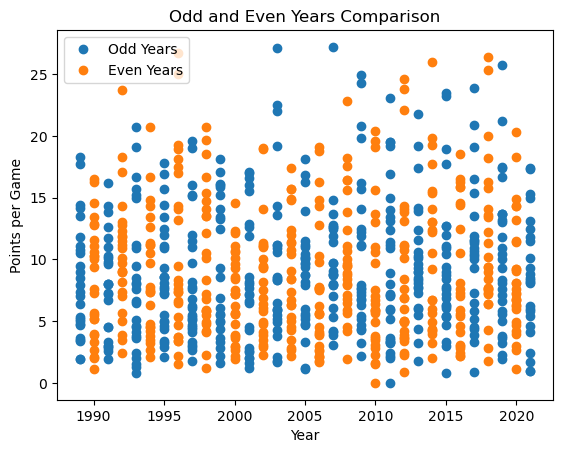

In [25]:
import matplotlib.pyplot as plt


plt.plot(odd_years.index.get_level_values('year'), odd_years.values, 'o', linestyle='None', label='Odd Years')
plt.plot(even_years.index.get_level_values('year'), even_years.values, 'o', linestyle='None', label='Even Years')


plt.xlabel('Year')
plt.ylabel('Points per Game')
plt.title('Odd and Even Years Comparison')
plt.legend()
plt.show()





In [26]:
#a formula i created in assessing the efficiency of each players
df["efficiency"] = df["points_per_game"] + 0.5 * df["average_total_rebounds"] + 0.75 * df["average_assists"]
df = df.dropna()
df

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,efficiency
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,13.975
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,9.375
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,18.300
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,22.075
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,11.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1913,2021,51,51,MEM,Brandon Boston Jr.,Kentucky,1.0,51.0,760.0,...,0.819,14.9,6.7,2.2,1.0,0.4,0.026,-3.3,-0.3,8.550
1913,1914,2021,52,52,DET,Luka Garza,Iowa,1.0,32.0,389.0,...,0.623,12.2,5.8,3.1,0.6,0.8,0.093,-2.5,-0.1,7.800
1914,1915,2021,53,53,PHI,Charles Bassey,Western Kentucky,1.0,23.0,168.0,...,0.750,7.3,3.0,2.7,0.3,0.8,0.220,1.9,0.2,4.575
1915,1916,2021,54,54,IND,Sandro Mamukelashvili,Seton Hall,1.0,41.0,407.0,...,0.818,9.9,3.8,2.0,0.5,1.1,0.135,-0.3,0.2,5.175


In [62]:
df["efficiency_rating"] = (df["efficiency"] - df["efficiency"].min())/ (df["efficiency"].max() - df["efficiency"].min())
df
#normalization


,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,efficiency,efficiency_rating,draft_diff
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,13.975,0.397015,-29.5
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,9.375,0.259701,-28.5
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,14.2,4.3,2.6,55.7,0.109,0.2,13.5,18.300,0.526119,-27.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,18.3,4.4,2.1,88.7,0.122,0.8,24.9,22.075,0.638806,-26.5
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,11.750,0.330597,-25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1913,2021,51,51,MEM,Brandon Boston Jr.,Kentucky,1.0,51.0,760.0,...,6.7,2.2,1.0,0.4,0.026,-3.3,-0.3,8.550,0.235075,20.5
1913,1914,2021,52,52,DET,Luka Garza,Iowa,1.0,32.0,389.0,...,5.8,3.1,0.6,0.8,0.093,-2.5,-0.1,7.800,0.212687,21.5
1914,1915,2021,53,53,PHI,Charles Bassey,Western Kentucky,1.0,23.0,168.0,...,3.0,2.7,0.3,0.8,0.220,1.9,0.2,4.575,0.116418,22.5
1915,1916,2021,54,54,IND,Sandro Mamukelashvili,Seton Hall,1.0,41.0,407.0,...,3.8,2.0,0.5,1.1,0.135,-0.3,0.2,5.175,0.134328,23.5


### Part 2

A) Prompt: Analyze draft position value and team success/deficiencies comapared to expectation. 

 

a. Create a method for valueing each draft slot in the NBA Draft (picks 1 through 60 in most drafts).

In [63]:
def calculate_average_values(df):
    avg_all_minutes_played = df.groupby('overall_pick')['average_minutes_played'].mean()
    avg_win_shares = df.groupby('overall_pick')['win_shares'].mean()
    return avg_all_minutes_played, avg_win_shares


avg_all_minutes_played, avg_win_shares = calculate_average_values(df)



# Print average values for each draft position
for draft_position in range(1, 61):
    print(f"Draft Position {draft_position}: Avg Minutes_Played - {avg_all_minutes_played.get(draft_position, 0)}, Avg Win Shares - {avg_win_shares.get(draft_position, 0)}")


Draft Position 1: Avg Minutes_Played - 32.034615384615385, Avg Win Shares - 58.888461538461534
Draft Position 2: Avg Minutes_Played - 28.96551724137931, Avg Win Shares - 48.675862068965515
Draft Position 3: Avg Minutes_Played - 30.396428571428572, Avg Win Shares - 53.48571428571428
Draft Position 4: Avg Minutes_Played - 29.56896551724138, Avg Win Shares - 52.07241379310344
Draft Position 5: Avg Minutes_Played - 28.03076923076923, Avg Win Shares - 45.723076923076924
Draft Position 6: Avg Minutes_Played - 24.7, Avg Win Shares - 22.182142857142857
Draft Position 7: Avg Minutes_Played - 27.035714285714285, Avg Win Shares - 32.21071428571428
Draft Position 8: Avg Minutes_Played - 23.05483870967742, Avg Win Shares - 22.83225806451613
Draft Position 9: Avg Minutes_Played - 22.682758620689654, Avg Win Shares - 31.2
Draft Position 10: Avg Minutes_Played - 24.768965517241377, Avg Win Shares - 36.327586206896555
Draft Position 11: Avg Minutes_Played - 22.124137931034483, Avg Win Shares - 23.07931

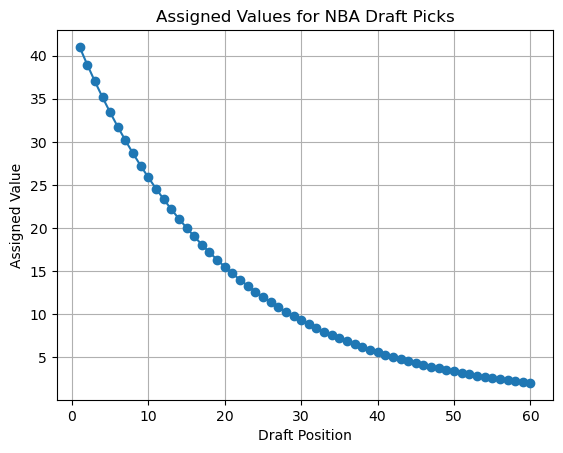

In [64]:

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def assign_draft_pick_values(avg_win_shares, observed_values):
    num_picks = len(avg_win_shares)
    draft_values = cp.Variable(num_picks)

    # Objective function: minimize squared error between assigned values and observed values
    objective = cp.Minimize(cp.sum_squares(draft_values - observed_values))

    # Constraints: values should be non-increasing and decrease by at least 5% from pick to pick
    constraints = [
        draft_values[:-1] - draft_values[1:] >= 0,
        draft_values[:-1] - draft_values[1:] >= 0.05 * draft_values[:-1]
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    assigned_values = draft_values.value

    return assigned_values

avg_win_shares = df.groupby('overall_pick')['win_shares'].mean()   
observed_values = df.groupby('overall_pick')['average_minutes_played'].mean()  

assigned_values = assign_draft_pick_values(avg_win_shares, observed_values)
assigned_values

# Plot assigned values
draft_positions = np.arange(1, len(assigned_values) + 1)
plt.plot(draft_positions, assigned_values, marker='o')
plt.xlabel('Draft Position')
plt.ylabel('Assigned Value')
plt.title('Assigned Values for NBA Draft Picks')
plt.grid(True)
plt.show()




The model proves to be a fairly strong model because the value decreases from pick to pick. I forced the quadratic program to pick numbers that decrease by at least 5% from pick to pick in order to produce a smoother graph. 

b. Conditional on the expected value of the draft positions, which NBA teams have over or underperformed the most when drafting during this time span. Which College Teams have had the players outperform expectations the most after entering the NBA?

In [65]:
expected = (1 + 60) / 2
expected
df[df['overall_pick'] >= 30.5]['team'] #underperformed
df[df['overall_pick'] < 30.5]['team'] #overperformed




filtered_df = df[df['overall_pick'] >= 30.5]

# Perform a count of occurrences for each team
team_counts = filtered_df['team'].value_counts()
# Sort the teams based on the count of occurrences
team_counts = team_counts.sort_values(ascending=False)

print("Teams that went above the expected value the most:")
overperforming_teams = team_counts[team_counts > team_counts.mean()]
print(overperforming_teams)

print("\nTeams that went below the expected value the most:")
underperforming_teams = team_counts[team_counts < team_counts.mean()]
print(underperforming_teams)



Teams that went above the expected value the most:
PHI    28
MIL    26
SAC    25
ATL    23
CHI    22
POR    21
DET    21
UTA    20
LAL    19
BOS    19
MIN    19
PHO    18
CLE    17
DEN    16
GSW    16
ORL    15
DAL    15
IND    15
HOU    14
SEA    14
Name: team, dtype: int64

Teams that went below the expected value the most:
LAC    13
SAS    13
NYK    11
MIA    11
WAS    11
MEM     8
NOP     8
WSB     7
TOR     7
CHH     6
BRK     6
NJN     5
CHA     5
VAN     4
CHO     4
OKC     4
NOH     3
Name: team, dtype: int64


In [66]:

average_draft_position = df['overall_pick'].mean()
better_than_average = df[df['overall_pick'] < average_draft_position]
college_frequency = better_than_average['college'].value_counts()
college_frequency = college_frequency.sort_values(ascending=False)

print("College teams with players having better-than-average draft positions:")
print(college_frequency)


College teams with players having better-than-average draft positions:
Duke                  39
Kentucky              35
UNC                   30
Arizona               23
Michigan              18
                      ..
Eastern Washington     1
Tennessee State        1
SMU                    1
Southern Miss          1
Houston                1
Name: college, Length: 141, dtype: int64


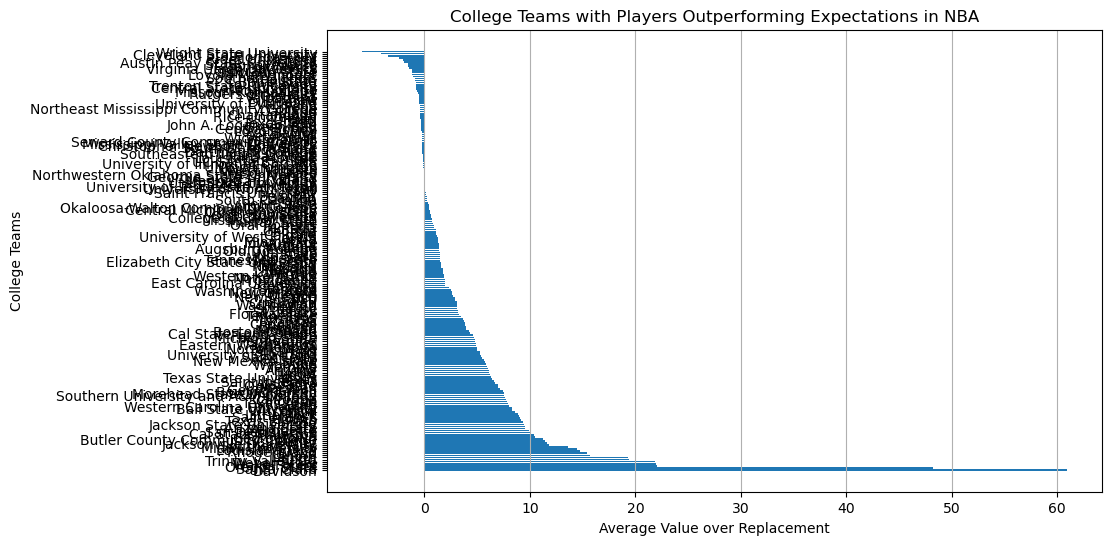

In [67]:
# Group the data by college and calculate the average value over replacement
college_performance = df.groupby('college')['value_over_replacement'].mean().reset_index()

# Sort the colleges based on average value over replacement in descending order
sorted_colleges = college_performance.sort_values('value_over_replacement', ascending=False)
# Generate the ranking graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_colleges['college'], sorted_colleges['value_over_replacement'])
plt.xlabel('Average Value over Replacement')
plt.ylabel('College Teams')
plt.title('College Teams with Players Outperforming Expectations in NBA')
plt.grid(True, axis='x')
plt.show()





c. Explain and present your findings with tables and visuals. What additional research areas would you focus on if given the opportunity to expand this study?

Given the oppurtunity, I would expand this study in gaining insights to productivity score by team.


In [68]:
df.groupby(['team'])['value_over_replacement'].agg(['mean', min, max])



,mean,min,max
team,,,
ATL,1.981034,-6.4,37.9
BOS,4.347368,-5.2,65.5
BRK,2.000000,-0.5,12.2
CHA,5.300000,-3.2,29.8
CHH,5.328571,-3.7,33.1
CHI,3.517241,-4.3,38.3
CHO,0.960000,-1.9,7.5
CLE,4.884091,-5.9,34.2
DAL,3.225641,-4.0,73.5


<Axes: xlabel='team', ylabel='value_over_replacement'>

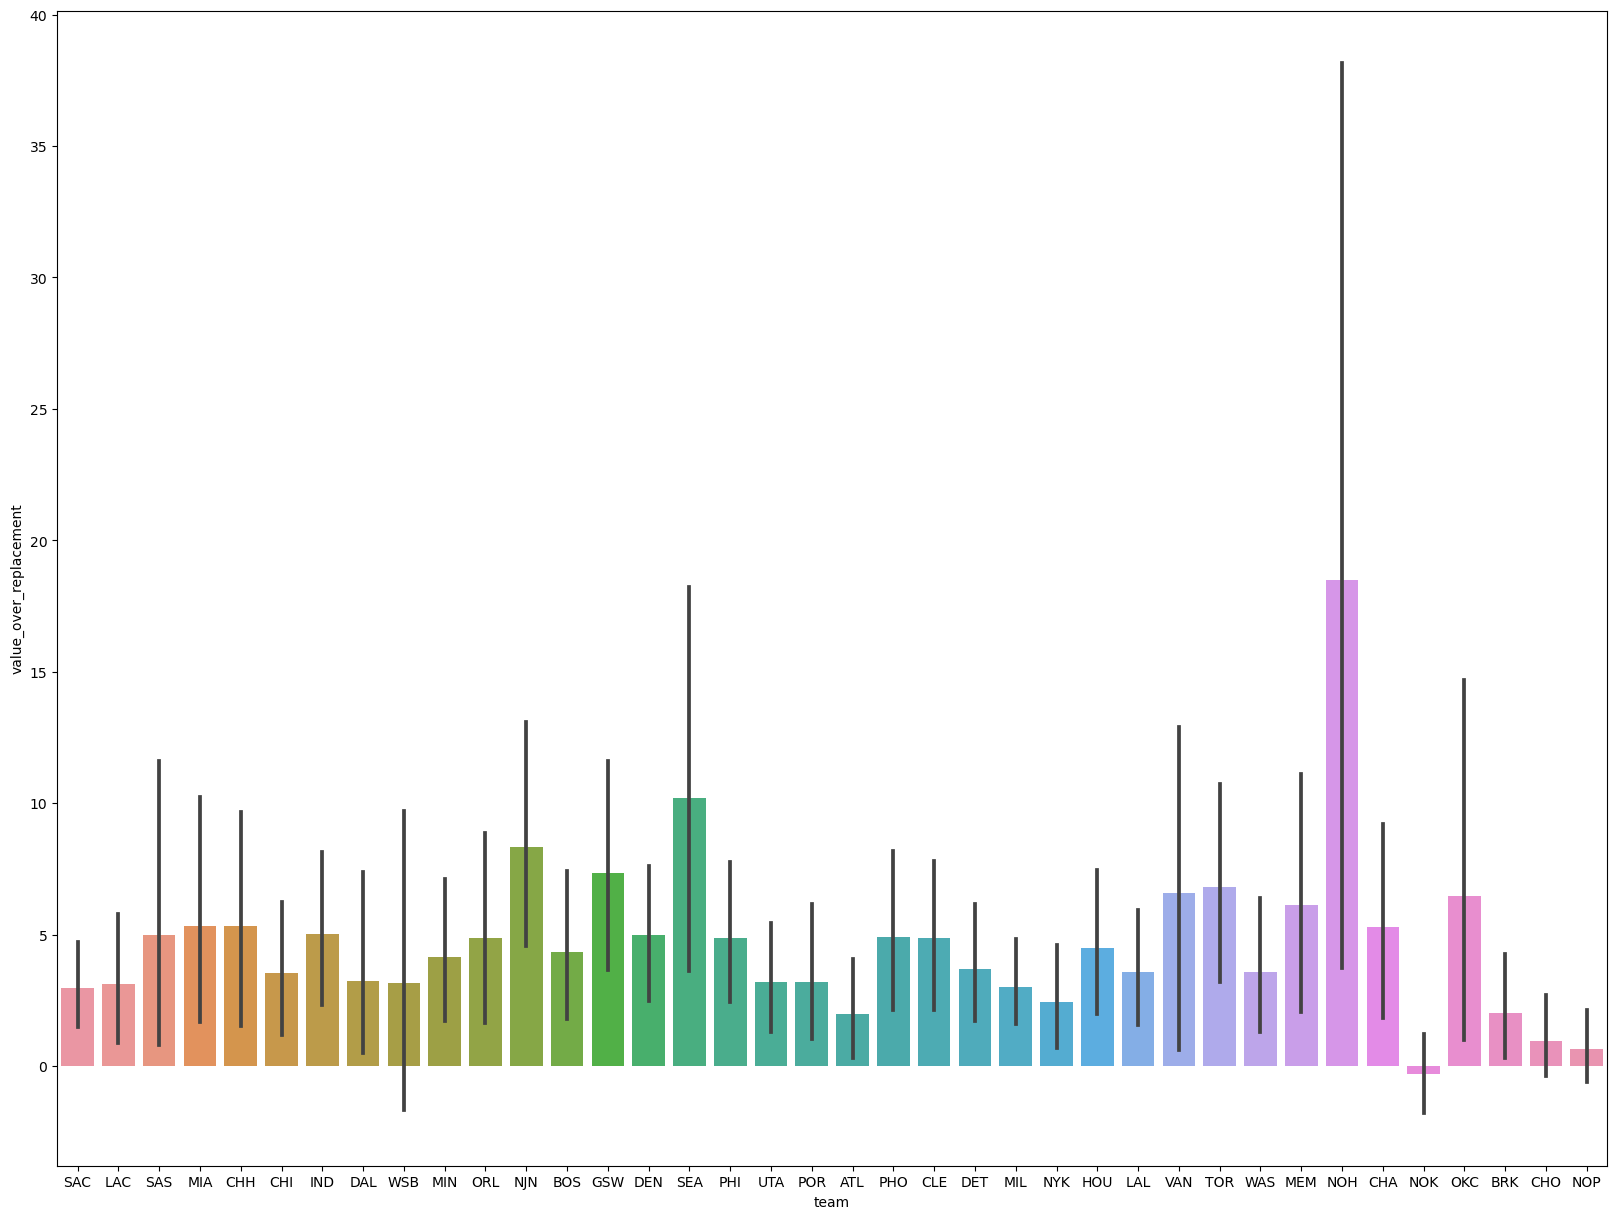

In [41]:
plt.figure(figsize = (20, 15))
sns.barplot(data = df, x = 'team', y = 'value_over_replacement')